# Visualizing CHESS temperature dependent data

Currently, there are two formats for CHESS data structures. The first was used prior to 2024, and was based on processing code written by Jacob Ruff. More recently, the beamline has switched to using `nxrefine`, a software plugin for NeXpy that allows for refinement of the scattering data.

## Import functions

In [1]:
import matplotlib.pyplot as plt
from nxs_analysis_tools import TempDependence
from nxs_analysis_tools.datasets import cubic

sample_directory = cubic() # Download example data and store in cache directory

## The `TempDependence` class

It is assumed that the folder structure of the temperature dependent scans is as follows:
```
samplename
└── labelname
    ├── 15
    ├── 100
    ├── 300
    ├── samplename_15.nxs
    ├── samplename_100.nxs
    ├── samplename_300.nxs
``` 
Here we create a `TempDependence` objecct called `sample` whose temperature folders are found in the path `'samplename/labelname/'`. This can also be set separately using the `.set_sample_directory()` method.

In [2]:
sample = TempDependence(sample_directory)

## Loading data

### Option 1: Loading `nxrefine` processed data using `load_transforms()`

Use the `load_transforms()` method to load the ".nxs" files. All files ending with ".nxs" are imported.

In [3]:
sample.load_transforms()

data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64

### Option 2: Loading `3rot_hkli.nxs` files using `load_datasets()`

Use the `load_datasets()` method to load the ".nxs" files. By default, all files ending with "hkli.nxs" are imported, but this can be changed using the `file_ending` parameter.

In [4]:
# Method for loading legacy CHESS data format
# sample.load_datasets(file_ending="hkli.nxs")

A subset of temperatures can be imported using the `temperatures_list` parameter. Temperatures can be listed here as numeric values (`[15,300]`) or as strings (`['15','300']`).

In [5]:
sample.load_transforms(temperatures_list=[15,300])

# For legacy CHESS data format
# sample.load_datasets(temperatures_list=[15,300])

data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)


Similarly, select temperatures can be ignored during loading using the `exclude_temperatures` parameter.

In [9]:
sample.load_datasets(exclude_temperatures=[25])

## Accessing the data

The datasets are stored under the `.datasets` attribute of the `TempDependence` object.

In [10]:
sample.datasets

{'15': NXdata('data'),
 '25': NXdata('data'),
 '35': NXdata('data'),
 '45': NXdata('data'),
 '55': NXdata('data'),
 '65': NXdata('data'),
 '75': NXdata('data'),
 '80': NXdata('data'),
 '104': NXdata('data'),
 '128': NXdata('data'),
 '153': NXdata('data'),
 '177': NXdata('data'),
 '202': NXdata('data'),
 '226': NXdata('data'),
 '251': NXdata('data'),
 '275': NXdata('data'),
 '300': NXdata('data')}

Use square brackets to index the individual datasets in the `NXentry`. Each dataset is a `NXdata` object and possesses the corresponding attributes and methods.

In [11]:
sample.datasets['15']

NXdata('data')

A list of temperatures is stored in the `.temperatures` attribute of the `TempDependence` object.

In [12]:
sample.temperatures

['15',
 '35',
 '45',
 '55',
 '65',
 '75',
 '80',
 '104',
 '128',
 '153',
 '177',
 '202',
 '226',
 '251',
 '275',
 '300']

## Visualizing the data

For example, each `NXdata` object has a `.plot()` method. Here we plot the L=0.0 plane.

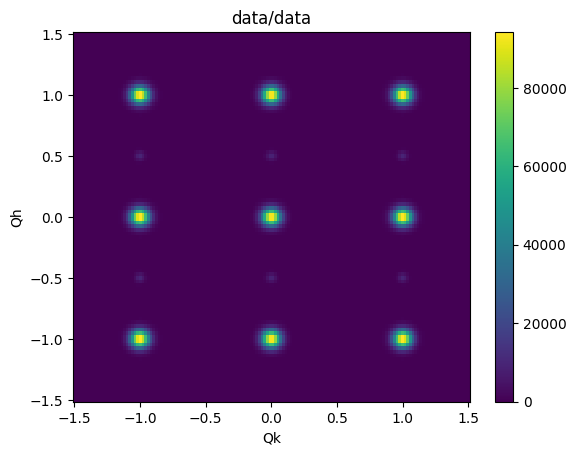

In [13]:
sample.datasets['15'][:,:,0.0].plot()

## Temperature dependent linecuts

Linecuts are performed using the `Scissors` class. An instance of the `Scissors` class is created for each temperature and stored in a dict attribute called `scissors`.

See documentation on the `Scissors` class for more information.

In [14]:
sample.scissors

{'15': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb46cdbe0>,
 '25': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb6c8b750>,
 '35': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb78d24e0>,
 '45': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb78d2570>,
 '55': <nxs_analysis_tools.datareduction.Scissors at 0x1ee955a7f50>,
 '65': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb78d1c70>,
 '75': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb78d1d90>,
 '80': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb78d1e20>,
 '104': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb78d1eb0>,
 '128': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb78d1f40>,
 '153': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb78d1fd0>,
 '177': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb78d2060>,
 '202': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb78d20f0>,
 '226': <nxs_analysis_tools.datareduction.Scissors at 0x1eeb78d2180>,
 '251': <nxs_analysis_tools.

The individual `Scissors` objects can be indexed using square brackets and the temperature.

In [15]:
sample.scissors['15']

Batch linecuts are peformed using a method of the `TempDependence` class called `.cut_data()`, which internally calls the `.cut_data()` method on each of the `Scissors` objects at each temperature.

In [25]:
# First, load all available temperatures
sample.load_transforms()

# Perform the linecut
sample.cut_data(center=(0,0,0), window=(0.75,0.2,0.1))

data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64

{'15': NXdata('data'),
 '25': NXdata('data'),
 '35': NXdata('data'),
 '45': NXdata('data'),
 '55': NXdata('data'),
 '65': NXdata('data'),
 '75': NXdata('data'),
 '80': NXdata('data'),
 '104': NXdata('data'),
 '128': NXdata('data'),
 '153': NXdata('data'),
 '177': NXdata('data'),
 '202': NXdata('data'),
 '226': NXdata('data'),
 '251': NXdata('data'),
 '275': NXdata('data'),
 '300': NXdata('data')}

Similarly, batch plotting of the linecuts can be achieved using the `.plot_linecuts()` method of the `TempDependence` object, which internally calls the `.plot_linecut()` method of the `Scissors` objects at each temperature.

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Qh 0.0 0.0', ylabel='counts'>)

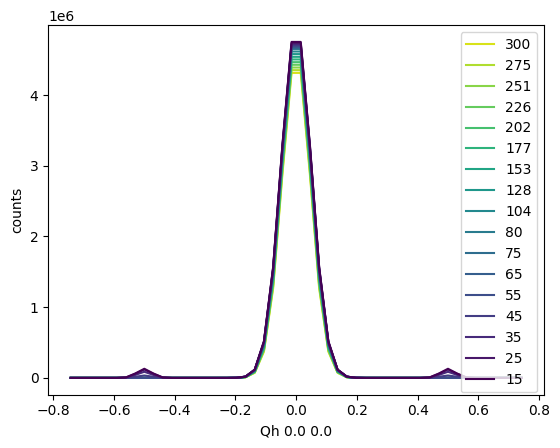

In [26]:
sample.plot_linecuts()

Any keyword arguments are passed to a `matplotlib` function `ax.plot()` within `.plot_linecuts()`, so the usual `matplotlib` parameters can be used to change the formatting.

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Qh 0.0 0.0', ylabel='counts'>)

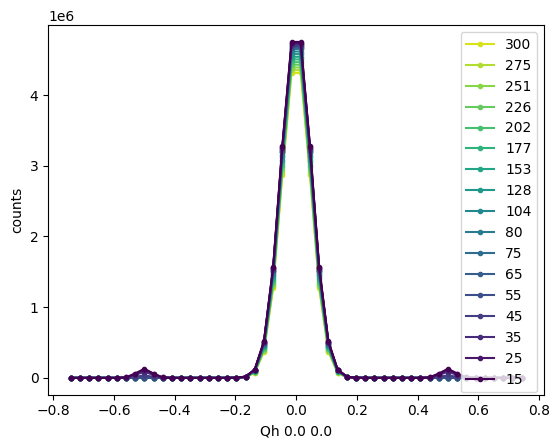

In [27]:
sample.plot_linecuts(linestyle='-', marker='.')

You can also introduce a vertical offset using the `vertical_offset` parameter.

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Qh 0.0 0.0', ylabel='counts'>)

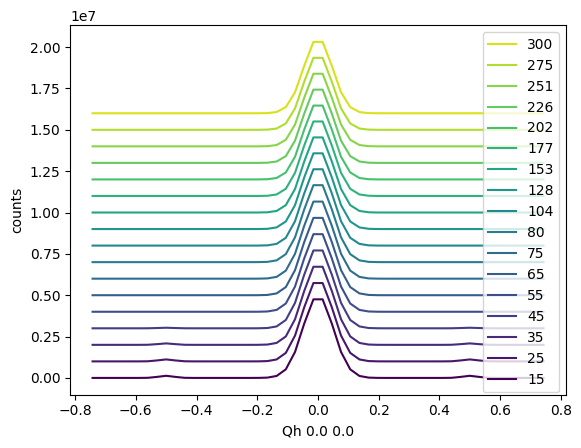

In [28]:
sample.plot_linecuts(vertical_offset=1e6)

## Visualizing the integration window

To visualize where the integration was performed, use the `.highlight_integration_window()` method of the `Scissors` class. 

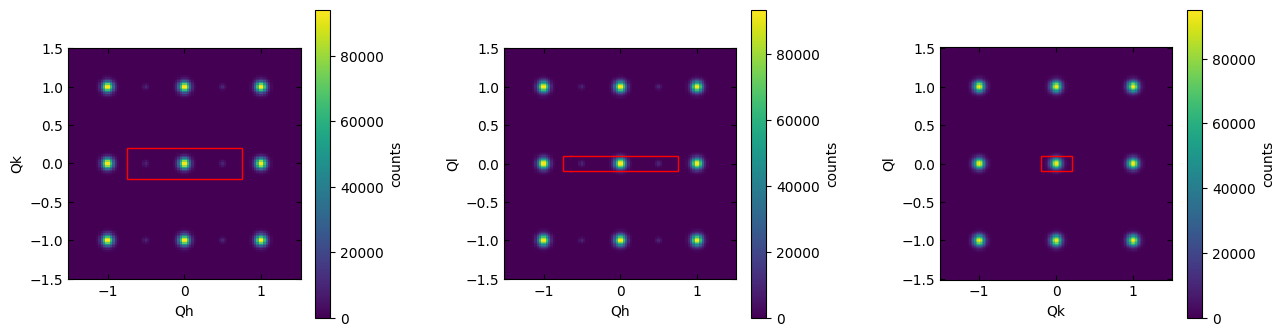

(<matplotlib.collections.QuadMesh at 0x1eecdda5d10>,
 <matplotlib.collections.QuadMesh at 0x1eece134690>)

In [29]:
sample.scissors['15'].highlight_integration_window()

Use the optional `width` and `height` parameters to zoom in on the region of interest.

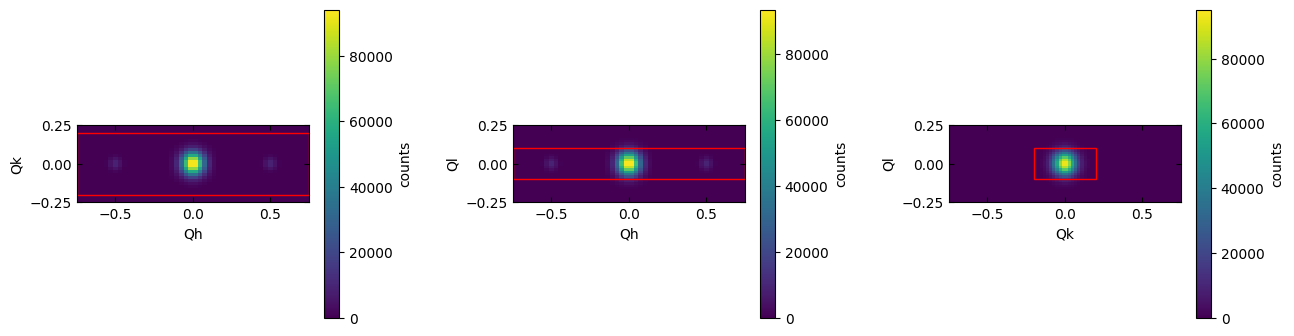

(<matplotlib.collections.QuadMesh at 0x1eece4f3610>,
 <matplotlib.collections.QuadMesh at 0x1eece261f90>)

In [30]:
sample.scissors['15'].highlight_integration_window(width=1.5, height=0.5)

Similarly, to plot a heatmap of the integrated volume itself, use the `.plot_integration_window()` method of the `Scissors` class.

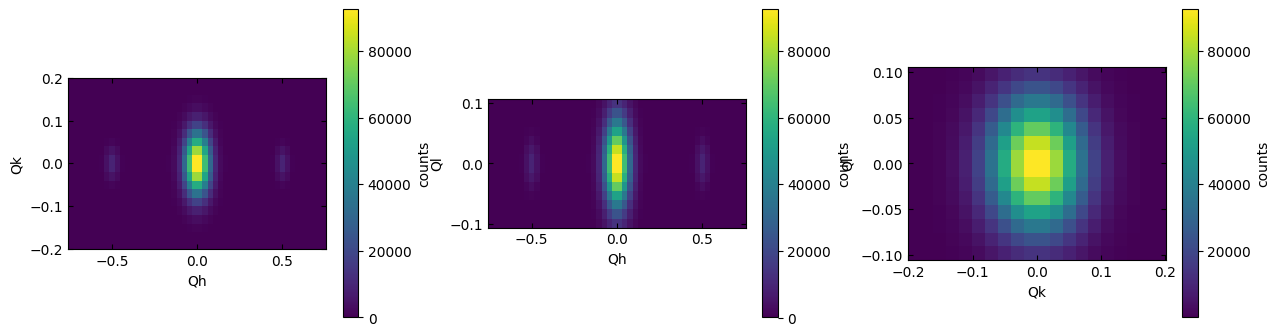

(<matplotlib.collections.QuadMesh at 0x1eece3b5e50>,
 <matplotlib.collections.QuadMesh at 0x1eece419950>)

In [31]:
sample.scissors['15'].plot_integration_window()